# Plot precipitation assymetry

In [15]:
unitconv=86400*365

In [17]:
ref_tropical=basecase_lnd[var][12*60:,:,:].mean(dim='time').where(landfrac>0.5).where(ds.lat>-23).where(ds.lat<23)

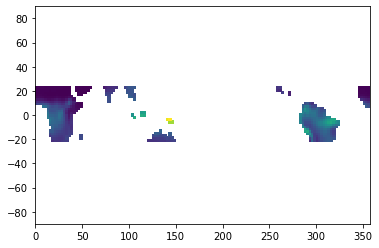

In [137]:
plt.pcolormesh(ref_tropical.lon, ref_tropical.lat, ref_tropical)

In [113]:
ds_amazon_ref=subset_amazon(basecase_lnd)[var][12*60:,:,:].mean(dim=['time'])#,'lat','lon'])
ds_asia_ref=subset_SEasia(basecase_lnd)[var][12*60:,:,:].mean(dim=['time'])#,'lat','lon']),'lat','lon'])
ds_amazon=subset_amazon(ds)[var][12*60:,:,:].mean(dim=['time'])#,'lat','lon']),'lat','lon'])
ds_asia=subset_SEasia(ds)[var][12*60:,:,:].mean(dim=['time'])#,'lat','lon']),'lat','lon'])

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [143]:
delta2=subset_africa(ds)[var].mean(dim=['time'])



/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


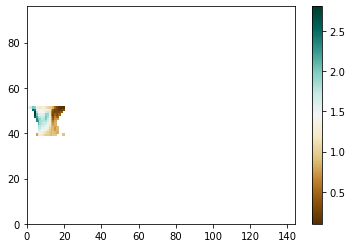

In [144]:
plt.pcolormesh(delta2*unitconv, cmap=plt.cm.BrBG)#, vmin=-0.2, vmax=0.2)
plt.colorbar()

In [145]:
def subset_amazon(ds):
    ds_subset=ds.where(ds.lat>-17).where(ds.lat<7).where(ds.lon>295).where(ds.lon<340)
    ds_subset=ds_subset.where(landfrac>0.5)
    return ds_subset

def subset_SEasia(ds):
    ds_subset=ds.where(ds.lat>-13).where(ds.lat<12).where(ds.lon>70).where(ds.lon<170)
    ds_subset=ds_subset.where(landfrac>0.5)
    return ds_subset

def subset_africa(ds):
    ds_subset=ds.where(ds.lat>-17).where(ds.lat<7).where(ds.lon>0).where(ds.lon<50)
    ds_subset=ds_subset.where(landfrac>0.5)
    return ds_subset

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


IndexError: list index out of range

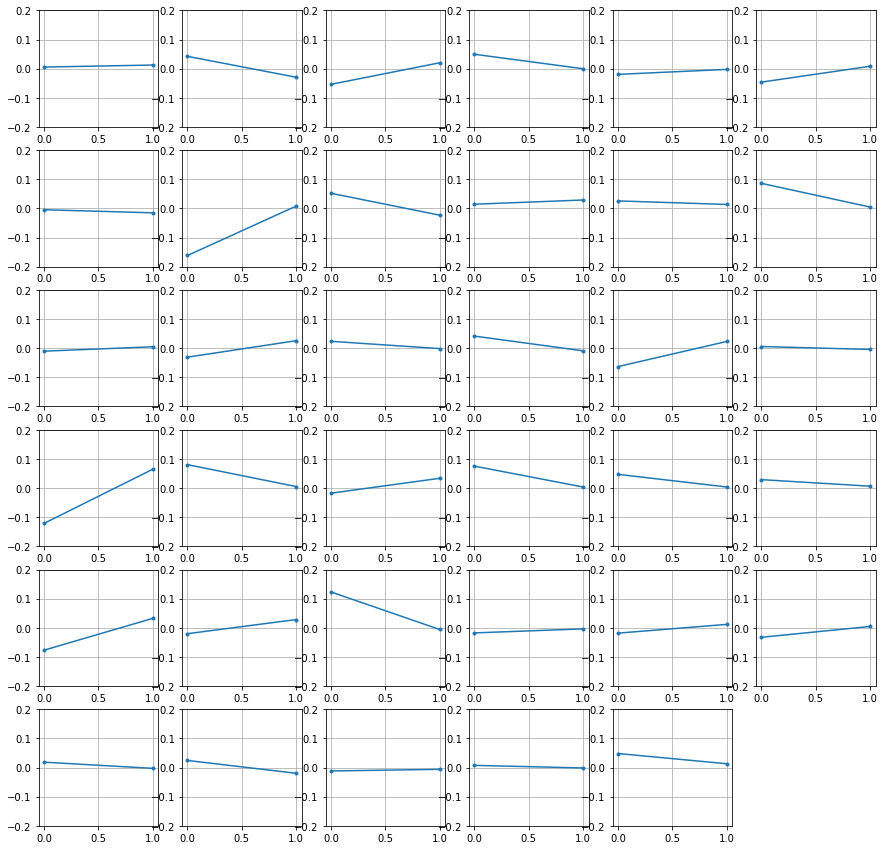

In [146]:
plt.figure(figsize=(15,15))
ds_amazon_ref=subset_amazon(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
ds_asia_ref=subset_africa(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
unitconv=86400*365
for i in np.arange(0,36):
    print(i)
    ds=ensemble_coupled[i]
    
    ds_amazon=subset_amazon(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    ds_asia=subset_africa(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    delta_amazon=ds_amazon.values-ds_amazon_ref.values
    delta_asia=ds_asia.values-ds_asia_ref.values
    plt.subplot(6,6,i+1)
    plt.plot([delta_amazon*unitconv, delta_asia*unitconv],'.-')
    
    plt.ylim([-0.2, 0.2])
    
    plt.grid()
plt.tight_layout()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


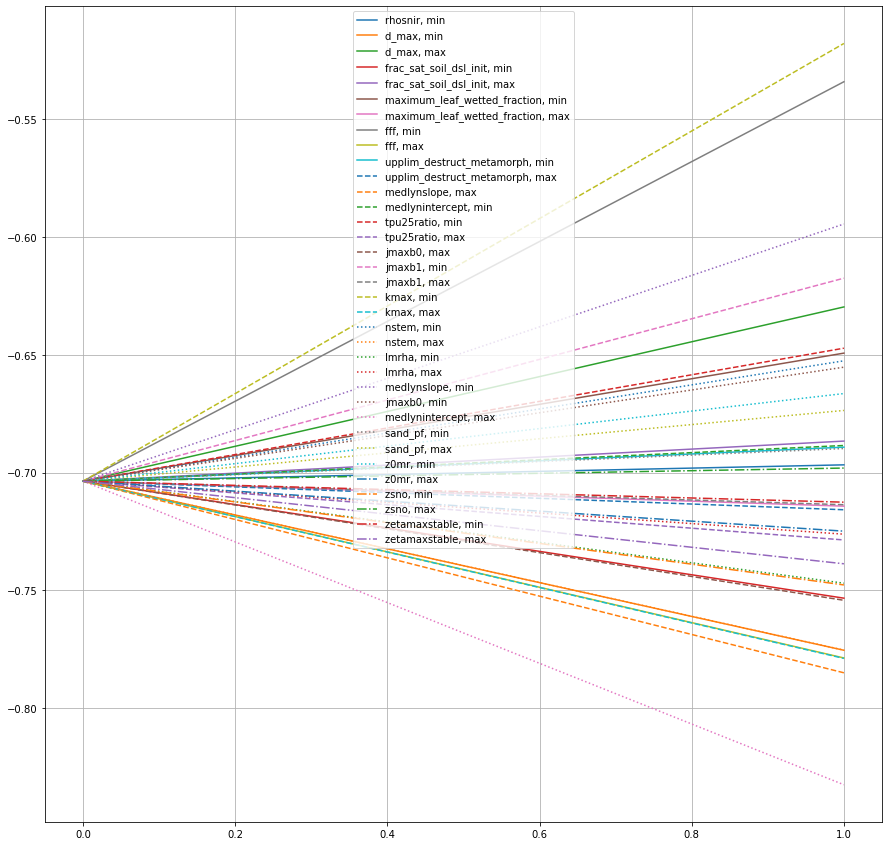

In [147]:
plt.figure(figsize=(15,15))
ds1_ref=subset_amazon(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
d2_ref=subset_africa(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
asym_ref=d2_ref-ds1_ref
unitconv=86400*365
for i in np.arange(0,35):
    if i<=9:
        linestyle='-'
    elif i<=19:
        linestyle='--'
    elif i<=29:
        linestyle=':'
    else:
        linestyle='-.'
    print(i)
    ds=ensemble_coupled[i]
    
    ds1=subset_amazon(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    ds2=subset_africa(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    asym = (ds2-ds1).values
    plt.plot([asym_ref*unitconv, asym*unitconv], label=crosswalk['description'].values[i],
             linestyle=linestyle)
    
plt.grid()
plt.legend()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


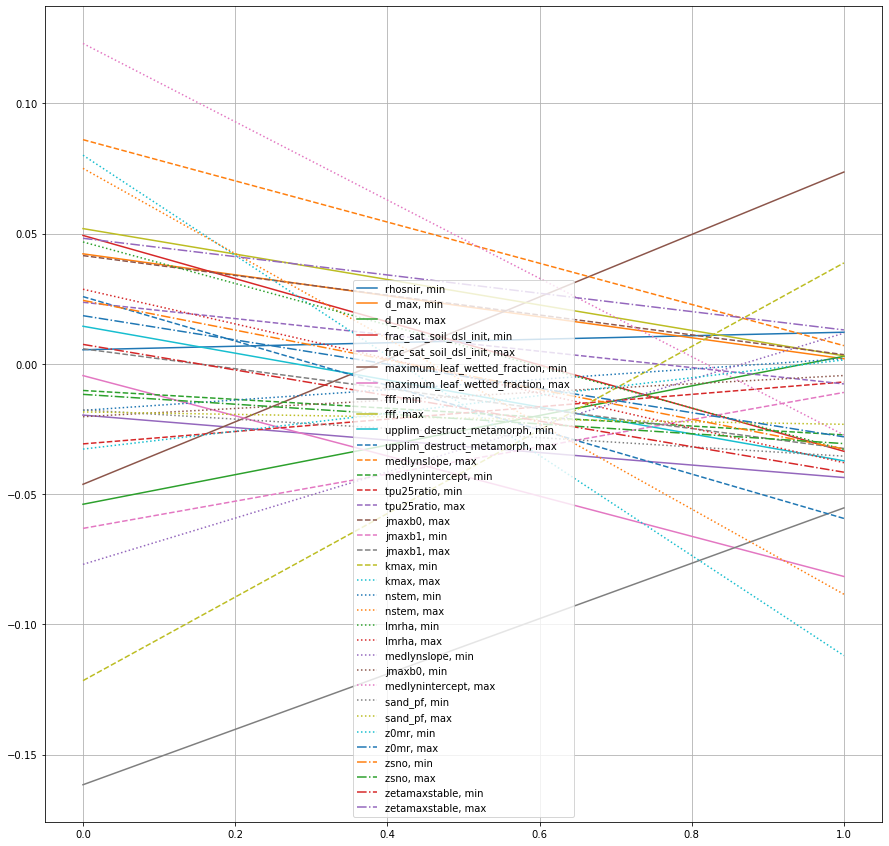

In [134]:
plt.figure(figsize=(15,15))
ds_amazon_ref=subset_amazon(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
ds_asia_ref=subset_SEasia(basecase_lnd)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
asym_ref=ds_asia_ref-ds_amazon_ref
unitconv=86400*365
for i in np.arange(0,35):
    if i<=9:
        linestyle='-'
    elif i<=19:
        linestyle='--'
    elif i<=29:
        linestyle=':'
    else:
        linestyle='-.'
    print(i)
    ds=ensemble_coupled[i]
    
    ds_amazon=subset_amazon(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    ds_asia=subset_SEasia(ds)[var][12*60:,:,:].mean(dim=['time','lat','lon'])
    delta_amazon=ds_amazon.values-ds_amazon_ref.values
    delta_asia=ds_asia.values-ds_asia_ref.values
    plt.plot([delta_amazon*unitconv, delta_asia*unitconv],
             label=crosswalk['description'].values[i],
             linestyle=linestyle)
    
plt.grid()
plt.legend()